In [49]:
pip install seaborn


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns

In [51]:
#Ler arquivo csv
df = pd.read_csv("/Users/minavelicastelo/Library/Mobile Documents/com~apple~CloudDocs/Reprograma/on33-python-s13-projeto-guiado-II/exercicios/para-sala/titanic.csv")

In [52]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [53]:
#Armazenar uma cópia de segurança nesta variável
df_backup = df.copy()

In [54]:
#Contar dados nulos em cada coluna
nulos_por_coluna = df.isnull().sum()
print(nulos_por_coluna)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [55]:
#Contar nulos por linhas
nulos_por_linha = df.isnull().sum(axis=1)
print(nulos_por_linha)

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64


In [56]:
#descrição dos dados
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
#Verificar infos do objeto
info = df.info()
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [58]:
#remover linhas duplicadas
df = df.drop_duplicates()

In [59]:
#função das linhas duplicadas
def visualizar_duplicados(df):
    duplicados = df[df.duplicated(keep=False)]
    return duplicados

In [60]:
linhas_duplicadas = visualizar_duplicados(df)
print(linhas_duplicadas)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [61]:
#apagar colunas do df
df = df.drop(columns=["SibSp", "Parch"])

In [62]:
#Apagar as infos NAN
df_teste = df.dropna(subset=["Cabin"])

In [63]:
#Renomear colunas
df.rename(columns={"PassengerId": "IDPassageiro",
"Survived": "Sobreviventes",
"Pclass": "Classe",
"Name": "Nome",
"Sex": "Sexo",
"Age": "Idade",
"Ticket": "Bilhete",
"Fare": "Tarifa",
"Cabin": "Cabine",
"Embarked": "Embarque"}, inplace=True)

In [64]:
df.columns

Index(['IDPassageiro', 'Sobreviventes', 'Classe', 'Nome', 'Sexo', 'Idade',
       'Bilhete', 'Tarifa', 'Cabine', 'Embarque'],
      dtype='object')

In [65]:
df.to_csv("titanic_tratado.csv", index=False)

Análise de dados

In [66]:
contagem_classe = df["Classe"].value_counts()

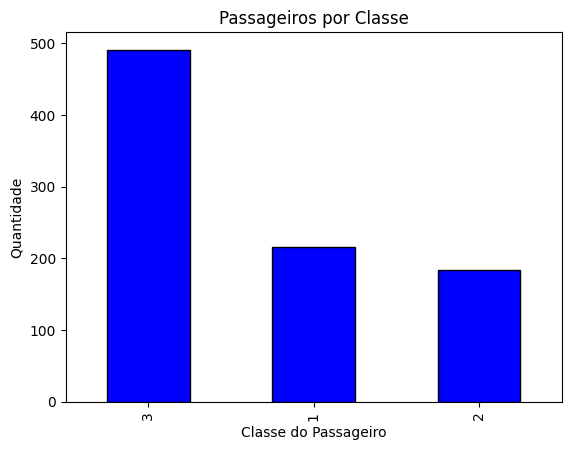

In [67]:
#Quantos passageiros estavam em cada classe à bordo do Titanic?

#contagem do número de passageiros
contagem_classe = df["Classe"].value_counts()

#Gráfico
contagem_classe.plot(kind="bar", color="blue", edgecolor="Black")

#Config do dráfico(rótulos)
plt.xlabel("Classe do Passageiro")
plt.ylabel("Quantidade")
plt.title("Passageiros por Classe")
plt.show()

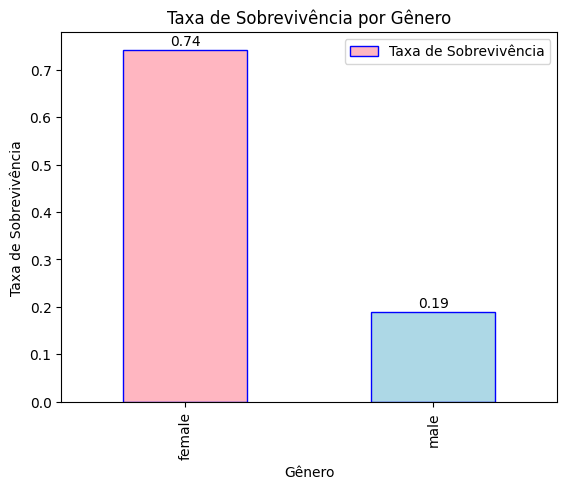

In [68]:
#Qual é a taxa de sobreviventes por gênero?

#agrupamento de gênero por sobreviventes
taxa_sob_genero = df.groupby("Sexo")["Sobreviventes"].mean()

##Cores para barras
cores= ["lightpink", "lightblue"]

#plotagem
barras = taxa_sob_genero.plot(edgecolor= "blue", kind="bar", color=cores)

#configuração do gráfico (rótulos)
plt.xlabel("Gênero")
plt.ylabel("Taxa de Sobrevivência")
plt.title("Taxa de Sobrevivência por Gênero")

#adicionar legendas
plt.legend(["Taxa de Sobrevivência"])

#Adicionar rótulos nos gráficos
for i, v in enumerate(taxa_sob_genero):
  barras.text(i, v + 0.01, f'{v:.2f}', color='black', ha = 'center')

#exibição do gráfico
plt.show()

# Teste de classe e sobrevivência

H0(hipótese nula): A idade **não tem** relação o número de sobreviventes. 

H1(hipótese alternativa): A idade **tem** relação o número de sobreviventes. 

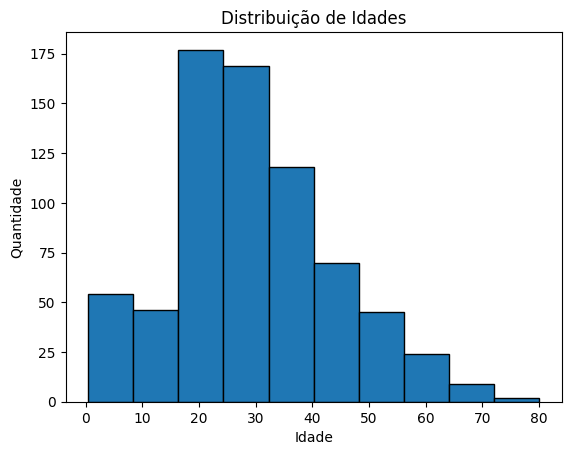

In [69]:
#Distribuição de idades

#plotagem
df["Idade"].plot.hist(bins=10, edgecolor="black")

#configuração do gráfico
plt.xlabel("Idade")
plt.ylabel("Quantidade")
plt.title("Distribuição de Idades")

#exibição do gráfico
plt.show()

In [70]:
#Teste de Hipótese
idade_sobreviventes = df[df["Sobreviventes"] == 1]["Idade"].dropna()
idade_nao_sobreviventes = df[df["Sobreviventes"] == 0]["Idade"].dropna()

#Teste t
estatistica_t, valor_p = ttest_ind(idade_sobreviventes, idade_nao_sobreviventes)
print("Teste T de idade")
print(f"Estatística T: ", estatistica_t)
print(f"Valor P: ", valor_p)


Teste T de idade
Estatística T:  -2.06668694625381
Valor P:  0.03912465401348248


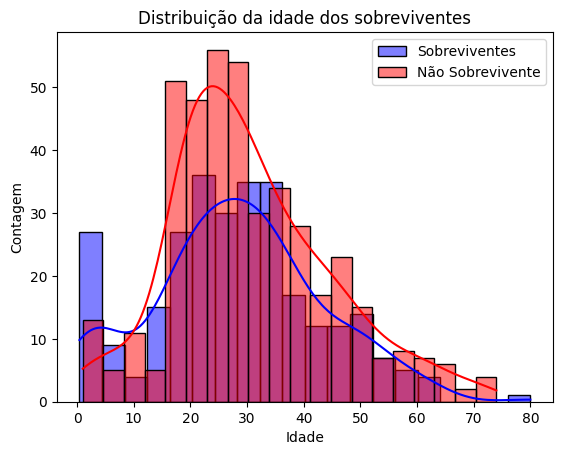

Rejeitamos a hipótese nula


In [71]:
#Gráfico
sns.histplot(idade_sobreviventes, color= 'blue', label='Sobreviventes', kde=True, bins=20)
sns.histplot(idade_nao_sobreviventes, color= 'red', label='Não Sobrevivente', kde=True, bins=20)

#Rótulos
plt.legend()
plt.title('Distribuição da idade dos sobreviventes')
plt.xlabel('Idade')
plt.ylabel('Contagem')
plt.show()

#Intrepretação
if valor_p < 0.05:
    print('Rejeitamos a hipótese nula')
else:
    print('Não Rejeitamos a hipótese nula')


In [72]:
#amostra
baby_df = df.sample(100)



In [73]:
baby_df.head(3)

,IDPassageiro,Sobreviventes,Classe,Nome,Sexo,Idade,Bilhete,Tarifa,Cabine,Embarque
303,304,1,2,"Keane, Miss. Nora A",female,NaN,226593,12.3500,E101,Q
593,594,0,3,"Bourke, Miss. Mary",female,NaN,364848,7.7500,NaN,Q
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,2661,15.2458,NaN,C


In [74]:
import sqlite3

In [75]:
#conexão    
conn = sqlite3.connect(':memory:')

#escrever o df em uma tabela sql
baby_df.to_sql('baby_df', conn, index=False, if_exists='replace')

#executar a consulta
query_sql = """
SELECT Sexo, COUNT(IdPassageiro) AS Contagem
FROM baby_df
GROUP BY Sexo;
"""

contagem_por_gen = pd.read_sql_query(query_sql, conn)
print(contagem_por_gen)

#fechar a conexão
conn.close()

     Sexo  Contagem
0  female        31
1    male        69


In [76]:
contagem_por_genero = baby_df['Sexo'].value_counts().reset_index()
contagem_por_genero.columns = ['Sexo', 'Contagem']
print(contagem_por_genero)

     Sexo  Contagem
0    male        69
1  female        31
